In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / data.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')             
def annot_plot_num(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

In [15]:
%matplotlib inline
sns.set()
from subprocess import check_output

In [16]:
import warnings                                            # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore')

In [170]:
data=pd.read_csv('Vehicle Insurance.csv')
data.head(5)

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,2,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,3,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,4,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,5,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [171]:
data=data.drop('Unnamed: 0',axis=1)

In [172]:
data.shape

(8630, 21)

In [173]:
data.dtypes

clv                              float64
Response                          object
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto               int64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints          int64
Number.of.Policies                 int64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                      object
dtype: object

In [174]:
data['Response'] = data['Response'].apply(lambda x: 1 if x == 'Yes' else 0)

In [175]:
data.isnull().sum()

clv                              0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location.Code                    0
Marital.Status                   0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Policy.Type                      0
Policy                           0
Renew.Offer.Type                 0
Sales.Channel                    0
Total.Claim.Amount               0
Vehicle.Class                    0
Vehicle.Size                     0
dtype: int64

In [176]:
data.describe()

,clv,Response,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount
count,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000
mean,6725.281515,0.142526,37586.405794,91.677057,15.084473,48.004287,0.389108,3.020626,427.131607
std,3934.876313,0.349609,30453.838594,32.648209,10.048979,27.880693,0.920491,2.445994,282.722326
min,1898.007675,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3858.177183,0.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,268.881398
50%,5569.220419,0.000000,33817.000000,81.000000,14.000000,48.000000,0.000000,2.000000,376.880363
75%,8456.408530,0.000000,62250.750000,108.000000,23.000000,71.000000,0.000000,4.000000,542.400000
max,21235.445570,1.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [177]:
data.describe(include='all')

,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,Monthly.Premium.Auto,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
count,8630.000000,8630.000000,8630,8630,8630,8630,8630.000000,8630,8630,8630.000000,...,8630.000000,8630.000000,8630.000000,8630,8630,8630,8630,8630.000000,8630,8630
unique,NaN,NaN,3,5,5,2,NaN,3,3,NaN,...,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,NaN,NaN,Basic,Bachelor,Employed,F,NaN,Suburban,Married,NaN,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,NaN,NaN,5314,2592,5366,4390,NaN,5467,4999,NaN,...,NaN,NaN,NaN,6412,3234,3518,3305,NaN,4461,6061
mean,6725.281515,0.142526,NaN,NaN,NaN,NaN,37586.405794,NaN,NaN,91.677057,...,48.004287,0.389108,3.020626,NaN,NaN,NaN,NaN,427.131607,NaN,NaN
std,3934.876313,0.349609,NaN,NaN,NaN,NaN,30453.838594,NaN,NaN,32.648209,...,27.880693,0.920491,2.445994,NaN,NaN,NaN,NaN,282.722326,NaN,NaN
min,1898.007675,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,61.000000,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,3858.177183,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,68.000000,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,268.881398,NaN,NaN
50%,5569.220419,0.000000,NaN,NaN,NaN,NaN,33817.000000,NaN,NaN,81.000000,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,376.880363,NaN,NaN
75%,8456.408530,0.000000,NaN,NaN,NaN,NaN,62250.750000,NaN,NaN,108.000000,...,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,542.400000,NaN,NaN


EDA

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   clv                            8630 non-null   float64
 1   Response                       8630 non-null   int64  
 2   Coverage                       8630 non-null   object 
 3   Education                      8630 non-null   object 
 4   EmploymentStatus               8630 non-null   object 
 5   Gender                         8630 non-null   object 
 6   Income                         8630 non-null   int64  
 7   Location.Code                  8630 non-null   object 
 8   Marital.Status                 8630 non-null   object 
 9   Monthly.Premium.Auto           8630 non-null   int64  
 10  Months.Since.Last.Claim        8630 non-null   int64  
 11  Months.Since.Policy.Inception  8630 non-null   int64  
 12  Number.of.Open.Complaints      8630 non-null   i

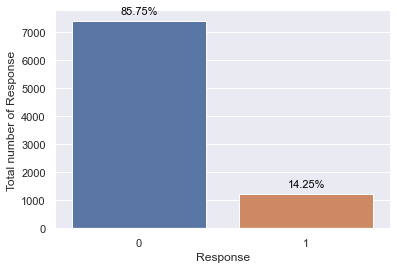

In [179]:
ax = sns.countplot('Response',data = data)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

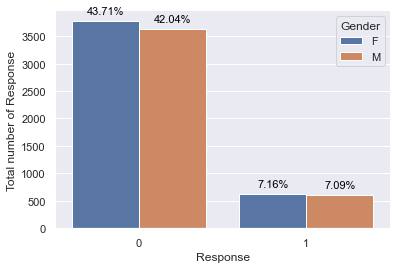

In [180]:
ax = sns.countplot('Response',hue = 'Gender' ,data = data)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

ratio of male and female for responding to a marketing call is almost same.

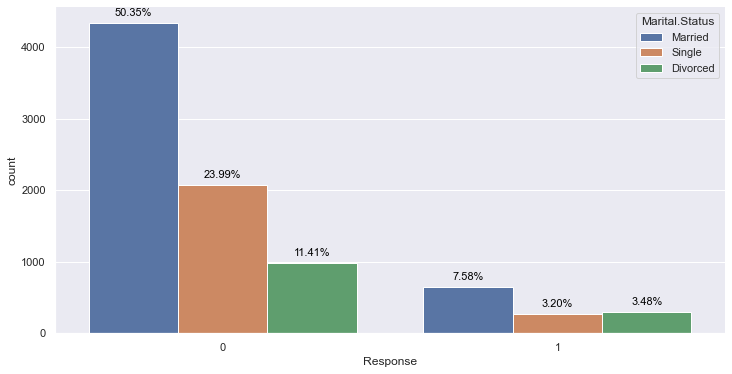

In [181]:
plt.figure(figsize=(12,6))
ax = sns.countplot('Response', hue = data['Marital.Status'], data = data)
annot_plot(ax,0.08,1)
plt.show()

out of 14% customers, 8% customers those who rsponded to marketing calls are from married category.

2.1.1 Response rate by renew offer

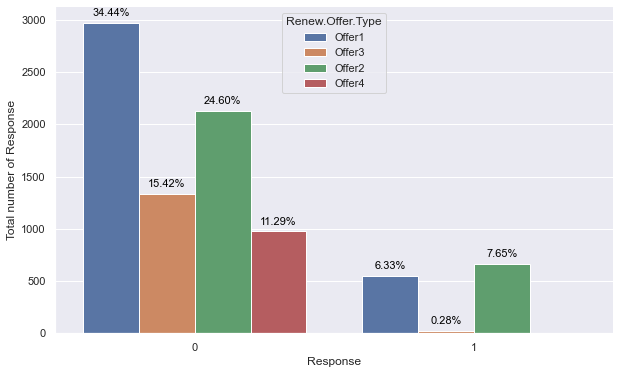

In [182]:
plt.figure(figsize=(10,6))
ax = sns.countplot('Response',hue = 'Renew.Offer.Type' ,data = data)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

2.1.2 Response rate by Education

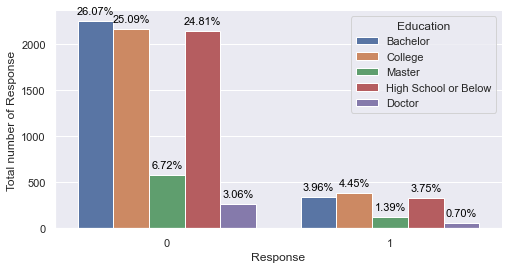

In [183]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response',hue = 'Education' ,data = data)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

2.1.3 Response rate by Sales Channel

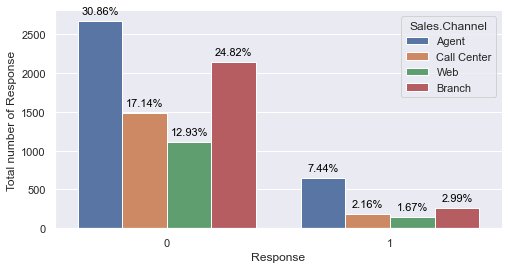

In [184]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response',hue = 'Sales.Channel' ,data = data)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

2.1.4 Response rate by Total Claim Amount

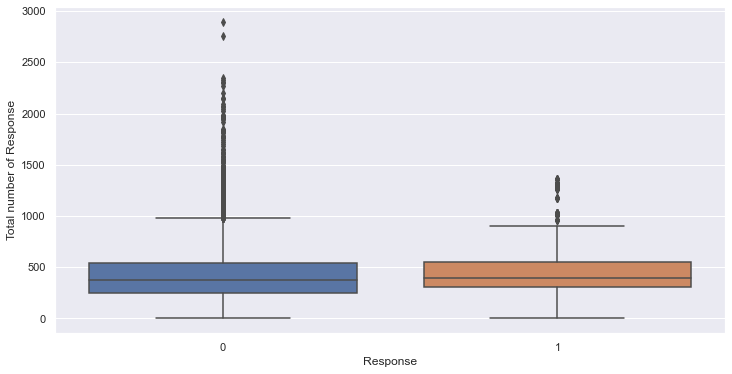

In [185]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Total.Claim.Amount' , x = 'Response', data = data)
plt.ylabel('Total number of Response')
plt.show()

2.1.5 Response rate by Income Distributions

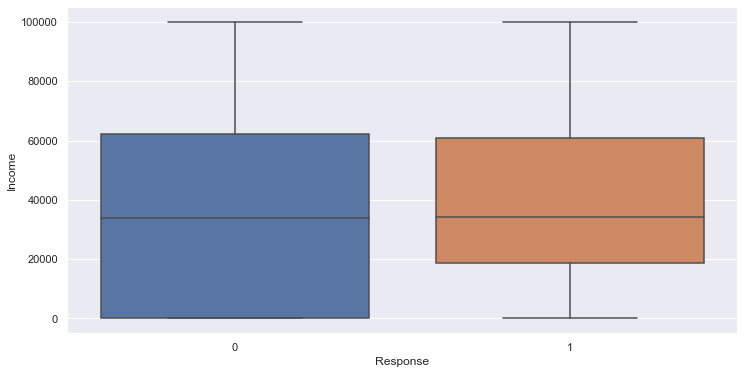

In [186]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Income' , x = 'Response', data = data)
plt.show()

2.1.6 Response rate by EmploymentStatus

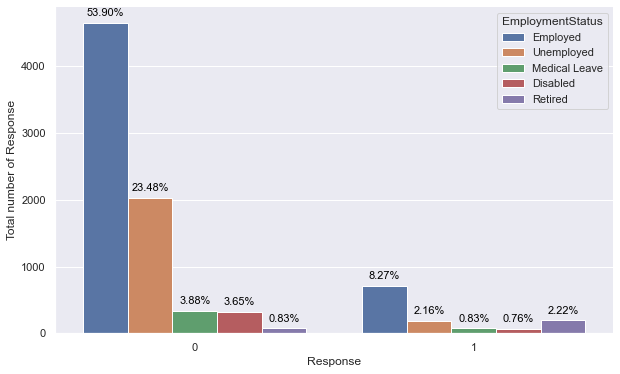

In [187]:
plt.figure(figsize=(10,6))
ax = sns.countplot('Response',hue = 'EmploymentStatus' ,data = data)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

2.1.7 Response rate by Vehicle Class:

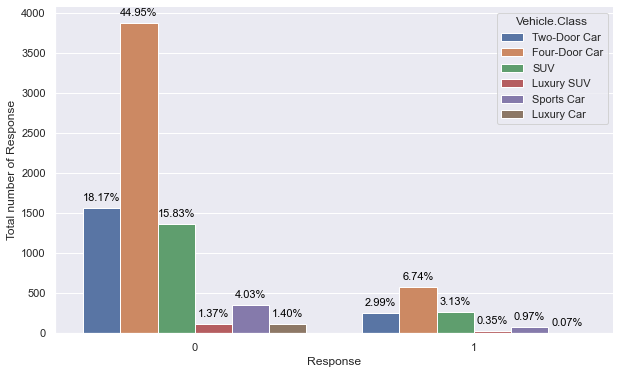

In [189]:
plt.figure(figsize=(10,6))
ax = sns.countplot('Response',hue = 'Vehicle.Class' ,data = data)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

2.1.8 Response rate by Policy:

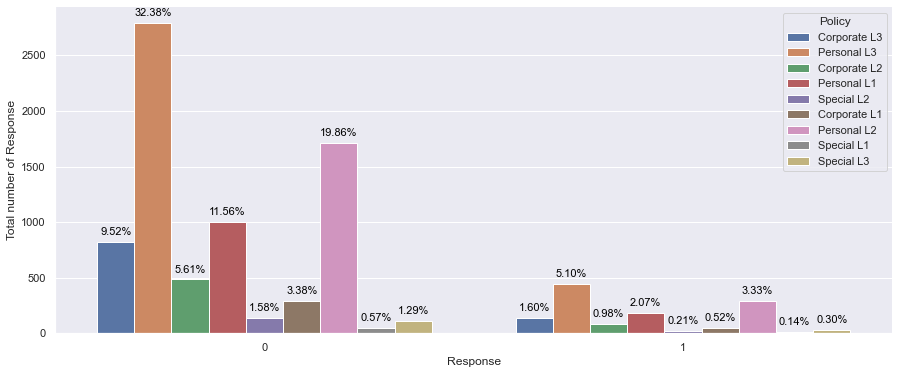

In [190]:
plt.figure(figsize=(15,6))
ax = sns.countplot('Response',hue = 'Policy' ,data = data)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

3. Regression Analysis with Continuous Variables Only

In [191]:
import statsmodels.api as sm

In [193]:
continous_var_df = data.select_dtypes(include=['int64','float'])
continous_var_df.nunique()

clv                              7602
Response                            2
Income                           5379
Monthly.Premium.Auto              188
Months.Since.Last.Claim            36
Months.Since.Policy.Inception     100
Number.of.Open.Complaints           6
Number.of.Policies                  9
Total.Claim.Amount               4820
dtype: int64

In [194]:
continous_var_df.columns

Index(['clv', 'Response', 'Income', 'Monthly.Premium.Auto',
       'Months.Since.Last.Claim', 'Months.Since.Policy.Inception',
       'Number.of.Open.Complaints', 'Number.of.Policies',
       'Total.Claim.Amount'],
      dtype='object')

In [195]:
continous_var_reg = sm.Logit(continous_var_df['Response'], continous_var_df.drop('Response', axis = 1))
continous_var_reg.fit().summary()

Optimization terminated successfully.
         Current function value: 0.420740
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 8630
Model:                          Logit   Df Residuals:                     8622
Method:                           MLE   Df Model:                            7
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                -0.02739
Time:                        16:30:31   Log-Likelihood:                -3631.0
converged:                       True   LL-Null:                       -3534.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
clv                           -2.412e-05    8.8e-06     -2.741      0.006   -4.14e-05   -6.87e-06
Income                        -2.366e-06   1.06e-06     -2.236      0.025   -4.44e-06   -2.92e-07
Monthly.Premium.Auto             -0.0073      0.001     -5.657      0.000      -0.010      -0.005
Months.Since.Last.Claim          -0.0226      0.003     -7.812      0.000      -0.028      -0.017
Months.Since.Policy.Inception    -0.0061      0.001     -6.094      0.000      -0.008      -0.004
Number.of.Open.Complaints        -0.0805      0.035     -2.320      0.020      -0.149      -0.012
Number.of.Policies               -0.0725      0.013     -5.541      0.000      -0.098      -0.047
Total.Claim.Amount                0.0001      0.000      0.673      0.501      -0.000       0.000
=================================================================================================
"""

A low P value suggests that your sample provides enough evidence that you can reject the null hypothesis for the entire population.

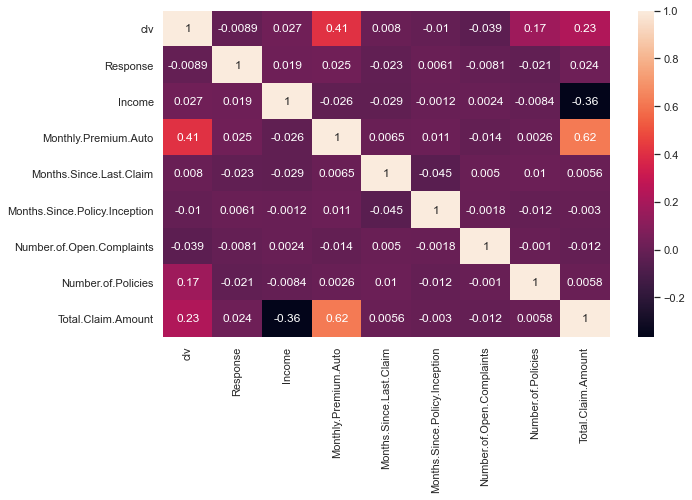

In [196]:
plt.figure(figsize=(10,6))
sns.heatmap(continous_var_df.corr(), annot = True)
plt.show()

4.Regression Analysis with Categorical Variables

In [197]:
categorical_df = data.select_dtypes(include='object')


In [198]:
categorical_df.nunique()

Coverage            3
Education           5
EmploymentStatus    5
Gender              2
Location.Code       3
Marital.Status      3
Policy.Type         3
Policy              9
Renew.Offer.Type    4
Sales.Channel       4
Vehicle.Class       6
Vehicle.Size        3
dtype: int64

In [199]:
categorical_df.columns

Index(['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location.Code',
       'Marital.Status', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [200]:
cols=[ 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location.Code', 'Marital.Status', 'Policy.Type', 'Policy',
       'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class', 'Vehicle.Size']

In [201]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in categorical_df[cols]:
    categorical_df[col] = lb.fit_transform(categorical_df[col])

In [202]:
categorical_df.head()

,Coverage,Education,EmploymentStatus,Gender,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class,Vehicle.Size
0,0,0,1,0,1,1,0,2,0,0,5,1
1,1,0,4,0,1,2,1,5,2,0,0,1
2,2,0,1,0,1,1,1,5,0,0,5,1
3,0,0,4,1,1,1,0,1,0,2,3,1
4,0,0,1,1,0,2,1,3,0,0,0,1


In [204]:
categorical_train = sm.Logit(continous_var_df.Response, categorical_df)
categorical_train.fit().summary()

Optimization terminated successfully.
         Current function value: 0.386356
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 8630
Model:                          Logit   Df Residuals:                     8618
Method:                           MLE   Df Model:                           11
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                 0.05657
Time:                        16:30:53   Log-Likelihood:                -3334.3
converged:                       True   LL-Null:                       -3534.2
Covariance Type:            nonrobust   LLR p-value:                 6.565e-79
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Coverage            -0.0421      0.047     -0.888      0.374      -0.135       0.051
Education            0.0270      0.022      1.225      0.220      -0.016       0.070
EmploymentStatus    -0.0558      0.024     -2.302      0.021      -0.103      -0.008
Gender               0.0468      0.062      0.755      0.450      -0.075       0.168
Location.Code       -0.0614      0.048     -1.274      0.203      -0.156       0.033
Marital.Status      -0.4583      0.049     -9.404      0.000      -0.554      -0.363
Policy.Type          0.2578      0.136      1.901      0.057      -0.008       0.524
Policy              -0.1049      0.038     -2.792      0.005      -0.179      -0.031
Renew.Offer.Type    -0.5678      0.038    -14.792      0.000      -0.643      -0.493
Sales.Channel       -0.2289      0.031     -7.359      0.000      -0.290      -0.168
Vehicle.Class        0.0316      0.015      2.139      0.032       0.003       0.061
Vehicle.Size        -0.3589      0.054     -6.702      0.000      -0.464      -0.254
====================================================================================
"""

5. Regression Analysis with both Continous and Categorical Variables.

In [205]:
continous_var_df.reset_index(drop = True, inplace=True)
categorical_df.reset_index(drop = True, inplace=True)

In [206]:
all_data_df = pd.concat([continous_var_df,categorical_df], axis = 1)

In [207]:
all_data_df.head()

,clv,Response,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Coverage,...,EmploymentStatus,Gender,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class,Vehicle.Size
0,2763.519279,0,56274,69,32,5,0,1,384.811147,0,...,1,0,1,1,0,2,0,0,5,1
1,6979.535903,0,0,94,13,42,0,8,1131.464935,1,...,4,0,1,2,1,5,2,0,0,1
2,12887.431650,0,48767,108,18,38,0,2,566.472247,2,...,1,0,1,1,1,5,0,0,5,1
3,7645.861827,0,0,106,18,65,0,7,529.881344,0,...,4,1,1,1,0,1,0,2,3,1
4,2813.692575,0,43836,73,12,44,0,1,138.130879,0,...,1,1,0,2,1,3,0,0,0,1


In [208]:
total_train = sm.Logit(all_data_df.Response, all_data_df.drop(['Response'], axis = 1))
total_train.fit().summary()

Optimization terminated successfully.
         Current function value: 0.382816
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 8630
Model:                          Logit   Df Residuals:                     8610
Method:                           MLE   Df Model:                           19
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                 0.06522
Time:                        16:31:47   Log-Likelihood:                -3303.7
converged:                       True   LL-Null:                       -3534.2
Covariance Type:            nonrobust   LLR p-value:                 8.411e-86
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
clv                           -2.994e-05   9.43e-06     -3.177      0.001   -4.84e-05   -1.15e-05
Income                          4.06e-06   1.42e-06      2.850      0.004    1.27e-06    6.85e-06
Monthly.Premium.Auto             -0.0022      0.001     -1.533      0.125      -0.005       0.001
Months.Since.Last.Claim          -0.0078      0.003     -2.514      0.012      -0.014      -0.002
Months.Since.Policy.Inception    -0.0020      0.001     -1.788      0.074      -0.004       0.000
Number.of.Open.Complaints        -0.0527      0.036     -1.479      0.139      -0.122       0.017
Number.of.Policies               -0.0327      0.013     -2.440      0.015      -0.059      -0.006
Total.Claim.Amount                0.0008      0.000      4.502      0.000       0.000       0.001
Coverage                         -0.0224      0.055     -0.408      0.683      -0.130       0.085
Education                         0.0450      0.023      1.987      0.047       0.001       0.089
EmploymentStatus                 -0.0243      0.031     -0.774      0.439      -0.086       0.037
Gender                            0.0611      0.063      0.964      0.335      -0.063       0.185
Location.Code                    -0.1084      0.054     -1.993      0.046      -0.215      -0.002
Marital.Status                   -0.4592      0.050     -9.177      0.000      -0.557      -0.361
Policy.Type                       0.1926      0.138      1.394      0.163      -0.078       0.463
Policy                           -0.0635      0.040     -1.597      0.110      -0.142       0.014
Renew.Offer.Type                 -0.5872      0.040    -14.774      0.000      -0.665      -0.509
Sales.Channel                    -0.2090      0.032     -6.631      0.000      -0.271      -0.147
Vehicle.Class                     0.0390      0.015      2.524      0.012       0.009       0.069
Vehicle.Size                     -0.3053      0.057     -5.403      0.000      -0.416      -0.195
=================================================================================================
"""

Conclusion: The higher the Customer Lifetime value is, the less likely that the customer will be response to marketing calls.

6. Regression Analysis with excluding Non-significant variables

In [209]:
all_data_df.columns

Index(['clv', 'Response', 'Income', 'Monthly.Premium.Auto',
       'Months.Since.Last.Claim', 'Months.Since.Policy.Inception',
       'Number.of.Open.Complaints', 'Number.of.Policies', 'Total.Claim.Amount',
       'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location.Code',
       'Marital.Status', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [212]:
significant_cols = ['clv', 'Income', 'Monthly.Premium.Auto',
       'Months.Since.Last.Claim', 'Months.Since.Policy.Inception',
       'Number.of.Open.Complaints', 'Number.of.Policies', 'Total.Claim.Amount',
       'Marital.Status', 'Renew.Offer.Type',
       'Sales.Channel', 'Vehicle.Size']
trainData = sm.Logit(all_data_df.Response, all_data_df[significant_cols])
trainData.fit().summary()

Optimization terminated successfully.
         Current function value: 0.383902
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 8630
Model:                          Logit   Df Residuals:                     8618
Method:                           MLE   Df Model:                           11
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                 0.06256
Time:                        16:36:37   Log-Likelihood:                -3313.1
converged:                       True   LL-Null:                       -3534.2
Covariance Type:            nonrobust   LLR p-value:                 6.532e-88
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
clv                           -2.926e-05   9.37e-06     -3.123      0.002   -4.76e-05   -1.09e-05
Income                         4.276e-06   1.14e-06      3.735      0.000    2.03e-06    6.52e-06
Monthly.Premium.Auto             -0.0019      0.001     -1.440      0.150      -0.004       0.001
Months.Since.Last.Claim          -0.0085      0.003     -2.779      0.005      -0.014      -0.002
Months.Since.Policy.Inception    -0.0023      0.001     -2.156      0.031      -0.004      -0.000
Number.of.Open.Complaints        -0.0594      0.035     -1.677      0.094      -0.129       0.010
Number.of.Policies               -0.0343      0.013     -2.587      0.010      -0.060      -0.008
Total.Claim.Amount                0.0007      0.000      4.090      0.000       0.000       0.001
Marital.Status                   -0.4709      0.046    -10.131      0.000      -0.562      -0.380
Renew.Offer.Type                 -0.5835      0.039    -14.881      0.000      -0.660      -0.507
Sales.Channel                    -0.2127      0.031     -6.801      0.000      -0.274      -0.151
Vehicle.Size                     -0.3221      0.055     -5.850      0.000      -0.430      -0.214
=================================================================================================
"""

7.Classification:

In [213]:
y = all_data_df.Response
X = all_data_df.drop('Response', axis = 1)

In [214]:
from sklearn.model_selection import train_test_split, cross_validate
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

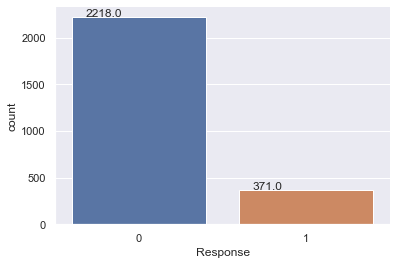

In [215]:
ax = sns.countplot(y_test)
annot_plot_num(ax,0.08,1)

7.1 SVC Classification

In [219]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print(confusion_matrix(svc_pred,y_test))
print('accuracy_score:',accuracy_score(svc_pred, y_test))
print(classification_report(svc_pred, y_test))

cross_val_score_svc = cross_validate(svc, X_train, y_train,cv = 5)

print('Cross validation test_score',cross_val_score_svc['test_score'].mean())

[[2218  371]
 [   0    0]]
accuracy_score: 0.8567014291232136
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      2589
           1       0.00      0.00      0.00         0

    accuracy                           0.86      2589
   macro avg       0.50      0.43      0.46      2589
weighted avg       1.00      0.86      0.92      2589

Cross validation test_score 0.8578050109827509


7.2.RandomForestClassifier

In [218]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(rfc_pred,y_test))
print('Accuracy score:',accuracy_score(rfc_pred, y_test))
print(classification_report(rfc_pred, y_test))

cross_val_score_rfc = cross_validate(rfc, X_train, y_train,cv = 5)


print('Cross validation test_score',cross_val_score_rfc['test_score'].mean())

[[2213    0]
 [   5  371]]
Accuracy score: 0.9980687524140595
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2213
           1       1.00      0.99      0.99       376

    accuracy                           1.00      2589
   macro avg       1.00      0.99      1.00      2589
weighted avg       1.00      1.00      1.00      2589

Cross validation test_score 0.9942068043755719
